In [26]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent))
from settings.params import (DATA_DIR,FILTERS_PARAMS)

### Chargement des datasets

In [10]:
def load_data():
    list_dataframe = {}
    for filename in os.listdir(DATA_DIR):
        df_name = f"df_{filename.split('.')[0]}"
        if filename.split('.')[-1] == 'csv':
            list_dataframe[df_name] = pd.read_csv(Path(DATA_DIR,filename),sep=',', index_col=[0])
        elif (filename.split('.')[-1] == 'xlsx') or (filename.split('.')[-1] == 'xls'):
            list_dataframe[df_name] = pd.read_excel(Path(DATA_DIR,filename))
        print(filename)
    return list_dataframe

In [11]:
datasets = load_data()

.DS_Store
indicators.csv
CLASS.xlsx
country_codes.csv


In [12]:
datasets.keys()

dict_keys(['df_indicators', 'df_CLASS', 'df_country_codes'])

*On a trois datasets sur les indicateurs, la classe( niveau de vie ) et la region et code de tous les pays*

### Exploration du dataframe Indicators

In [13]:
if('df_indicators' in list(datasets.keys())):
    df_indicators = datasets['df_indicators']
df_indicators.head()

,Country,"Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)","Espérance de vie à la naissance, total (années)","Population, total",Croissance de la population (% annuel),Migration nette,Indice du capital humain (échelle comprise entre 0 et 1),PIB ($ US courants)current US$constant US$current LCUconstant LCU,PIB par habitant ($ US courants)current US$constant US$current LCUconstant LCU,Croissance du PIB (% annuel),...,Accès à l’électricité (% de la population),"Retraits annuels d’eau douce, total (% des ressources internes)","Production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",People using safely managed sanitation services (% of population),Homicides intentionnels (pour 100 000 personnes),"Dette du gouvernement central, total (% du PIB)",Statistical performance indicators (SPI): Overall score (scale 0-100),Utilisateurs d Internet (% de la population),Proportion de sièges occupés par des femmes dans les parlements nationaux (%),"Investissements étrangers directs, entrées nettes (% du PIB)"
0,Afghanistan,No data available,62,41 128 771,"2,5",-183 672,"0,4","14,58","363,7","-20,7",...,"97,7",43,No data available,No data available,4,No data available,"49,8",18,27,"0,1"
1,Afrique du Sud,"20,5",62,59 893 885,"0,8",10 934,"0,4","405,87","6 776,5","2,0",...,"89,3",45,"1,9",No data available,42,"75,6","73,5",72,47,"2,2"
2,Albanie,"0,0",76,2 775 634,"-1,3",-10 612,"0,6","18,88","6 802,8","4,8",...,"100,0",3,"0,0",48,2,"82,4","75,4",79,36,"7,6"
3,Algerie,"0,5",76,44 903 225,"1,6",-18 797,"0,5","191,91","4 273,9","3,1",...,"99,8",87,"0,1",18,2,No data available,"55,1",71,8,"0,0"
4,Allemagne,"0,0",81,84 079 811,"1,1",312 735,"0,8","4,07","48 432,5","1,8",...,"100,0",23,"26,3",97,1,No data available,"87,5",91,35,"1,2"


In [14]:
print(f"Nous avons un dataset de {df_indicators.shape[0]} lignes et {df_indicators.shape[1]} colonnes")

Nous avons un dataset de 177 lignes et 25 colonnes


In [15]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 25 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Country                                                                                                          177 non-null    object
 1   Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)              177 non-null    object
 2   Espérance de vie à la naissance, total (années)                                                                  177 non-null    object
 3   Population, total                                                                                                177 non-null    object
 4   Croissance de la population (% annuel)      

Toutes les colonnes sont de types object

In [16]:
df_indicators.describe()

,Country,"Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)","Espérance de vie à la naissance, total (années)","Population, total",Croissance de la population (% annuel),Migration nette,Indice du capital humain (échelle comprise entre 0 et 1),PIB ($ US courants)current US$constant US$current LCUconstant LCU,PIB par habitant ($ US courants)current US$constant US$current LCUconstant LCU,Croissance du PIB (% annuel),...,Accès à l’électricité (% de la population),"Retraits annuels d’eau douce, total (% des ressources internes)","Production d’électricité à partir de sources d’énergie renouvelables, hors énergie hydroélectrique (% du total)",People using safely managed sanitation services (% of population),Homicides intentionnels (pour 100 000 personnes),"Dette du gouvernement central, total (% du PIB)",Statistical performance indicators (SPI): Overall score (scale 0-100),Utilisateurs d Internet (% de la population),Proportion de sièges occupés par des femmes dans les parlements nationaux (%),"Investissements étrangers directs, entrées nettes (% du PIB)"
count,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
unique,177,76,31,177,50,172,8,175,177,103,...,66,61,66,64,30,81,124,72,52,90
top,Afghanistan,No data available,74,41 128 771,"0,8",0,"0,6","18,88","363,7","2,6",...,"100,0",No data available,No data available,No data available,1,No data available,No data available,79,No data available,No data available
freq,1,44,14,1,12,5,41,2,1,5,...,100,33,60,77,37,93,32,7,18,11


In [17]:
df_indicators.isna().sum().value_counts()

0    25
dtype: int64

*On peut voir que la valeur "Data not available" n'est pas considérée comme une valeur nulle. Ce qui est normale. Dans la suite, nous la définirons comme valeur manquante.*

Nettoyage des donnees

In [18]:
#Verifions s'il y'a des colonnes avec des caractères non-ascii
cols_with_no_ascii_val = []
for col in df_indicators.columns:
    has_non_ascii = any(df_indicators[col].apply(lambda x: any(ord(c) > 127 for c in str(x))))
    if has_non_ascii | col.islower() == False:
        cols_with_no_ascii_val.append(col)
        print(f"la colonne: '{col}' contiens des caractères non-ASCII.")
print(f"\nIl existe: {len(cols_with_no_ascii_val)} colonnes avec des valeurs non-ASCII ou avec des lettres majuscules")

la colonne: 'Country' contiens des caractères non-ASCII.
la colonne: 'Ratio de la population pauvre disposant de moins de $ 1,90 par jour (2011 PPA) (% de la population)' contiens des caractères non-ASCII.
la colonne: 'Espérance de vie à la naissance, total (années)' contiens des caractères non-ASCII.
la colonne: 'Croissance de la population (% annuel)' contiens des caractères non-ASCII.
la colonne: 'Indice du capital humain (échelle comprise entre 0 et 1)' contiens des caractères non-ASCII.
la colonne: 'Croissance du PIB (% annuel)' contiens des caractères non-ASCII.
la colonne: 'Chômage, total (% de la population) (estimation modélisée OIT)' contiens des caractères non-ASCII.
la colonne: 'Inflation, prix à la consommation (% annuel)' contiens des caractères non-ASCII.
la colonne: 'Envois de fonds des travailleurs et rémunérations des salariés, reçus (% du PIB)' contiens des caractères non-ASCII.
la colonne: 'Émissions de CO2 (tonnes métriques par habitant)' contiens des caractères no

In [45]:
def contains_non_ascii(s):
    return s.isascii() if isinstance(s, str) else False

contains_non_ascii_indic_data = df_indicators.applymap(contains_non_ascii).any()

if contains_non_ascii_indic_data.any():
    print("Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.")
else:
    print("Le DataFrame ne contient que des caractères ASCII.")

Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.


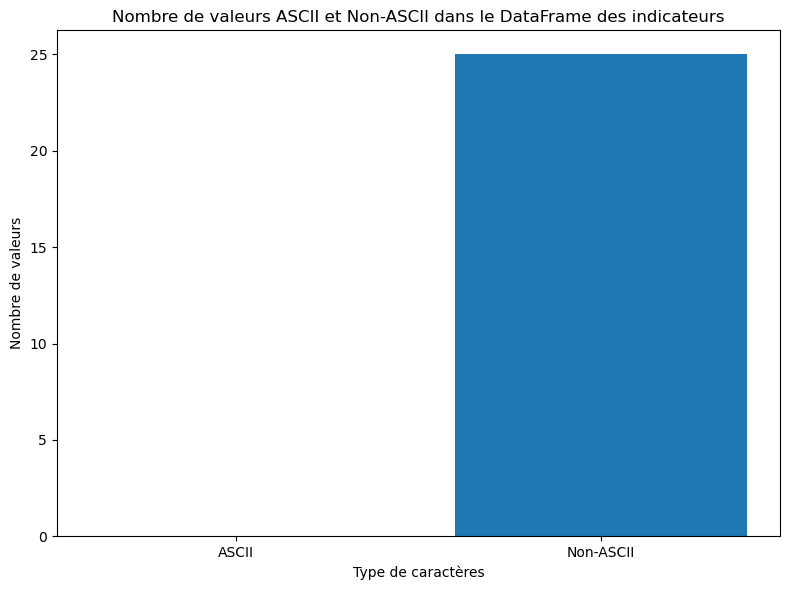

In [51]:
nombre_indic_ascii = (~contains_non_ascii_indic_data).sum()
nombre_indic_non_ascii = contains_non_ascii_indic_data.sum()
# Création d'un graphique à barres pour visualiser le résultat
plt.figure(figsize=(8, 6))
plt.bar(['ASCII', 'Non-ASCII'], [nombre_indic_ascii, nombre_indic_non_ascii])
plt.title("Nombre de valeurs ASCII et Non-ASCII dans le DataFrame des indicateurs")
plt.xlabel("Type de caractères")
plt.ylabel("Nombre de valeurs")
plt.tight_layout()
plt.show()

In [20]:
# Verifions la qualité des données de la colonne Country, ceci est important pour la jointure des tables
duplicated_countries = df_indicators[df_indicators['Country'].duplicated()]
print("Nombre de doublons potentiels dans la colonne 'Country':", len(duplicated_countries))

Nombre de doublons potentiels dans la colonne 'Country': 0


In [21]:
# Vérifier les valeurs manquantes
missing_countries = df_indicators['Country'].isnull().sum()
print("Nombre de valeurs manquantes dans la colonne 'Country':", missing_countries)

Nombre de valeurs manquantes dans la colonne 'Country': 0


*pour imputer les données manquantes, on va utiliser la médiane qui est moins sensible aux outliers*


In [22]:
# Compter le nombre de lignes avec des espaces inutiles dans la colonne 'Country'
rows_with_extra_spaces = df_indicators[df_indicators['Country'].str.endswith(' ') | df_indicators['Country'].str.startswith(' ')]
print(f"Il existe: {len(rows_with_extra_spaces)} pays avec des espaces inutiles à la fin ou au début de la colonne Country\n")
rows_with_extra_spaces['Country']

Il existe: 177 pays avec des espaces inutiles à la fin ou au début de la colonne Country



0         Afghanistan 
1      Afrique du Sud 
2             Albanie 
3             Algerie 
4           Allemagne 
            ...       
172         Venezuela 
173          Viet Nam 
174    Yemen, Rep. du 
175            Zambie 
176          Zimbabwe 
Name: Country, Length: 177, dtype: object

*On peut corriger en faisant du strip*

In [23]:
df_indicators.dtypes.unique()

array([dtype('O')], dtype=object)

* On peut bien voir que toutes les données sont considérées comme des objets. Alors que dans la réalité certaines données comme les chiffres sont en vrai des valeurs numériques. Ceci est à corriger en enlevant les virgules et transformant en float*

In [24]:
number_of_nan = (df_indicators == "No data available").sum().sum()
print(f"Il y'a en réalité: {number_of_nan} valeur(s) nulles dans le dataset des indicateurs")

Il y'a en réalité: 498 valeur(s) nulles dans le dataset des indicateurs


/var/folders/gn/cr4yj18d1tv34pkws9v_kq1r0000gn/T/ipykernel_15921/1760111056.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


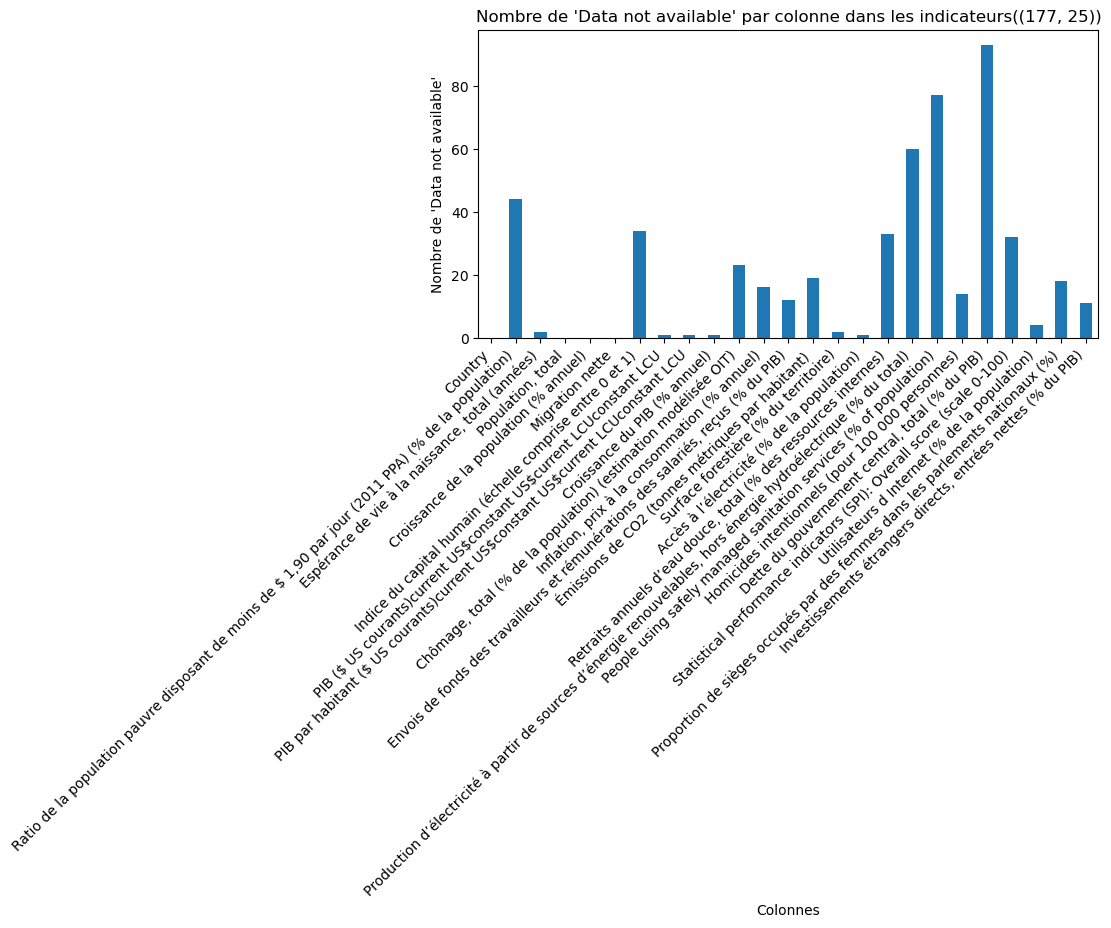

In [66]:
# Voyons la distribution pour chaque colonne
nombre_data_not_available_par_colonne = df_indicators.apply(lambda col: col.str.count('No data available').sum())

# Création d'un graphique à barres pour visualiser le résultat
plt.figure(figsize=(8, 4))
nombre_data_not_available_par_colonne.plot(kind='bar')
plt.title(f"Nombre de 'Data not available' par colonne dans les indicateurs({df_indicators.shape})")
plt.xlabel("Colonnes")
plt.ylabel("Nombre de 'Data not available'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Vérifions si il ny'a pas ded données dupliquées
duplicated_rows = df_indicators[df_indicators.duplicated()].shape[0]
print(f"Il y'a: {duplicated_rows} dupliquée(s) dans ce dataframe")

Il y'a: 0 dupliquée(s) dans ce dataframe


### Analyser le dataframe Country_codes

In [31]:
if('df_country_codes' in list(datasets.keys())):
    df_country_codes = datasets['df_country_codes']
df_country_codes.head()

,id,name,region
0,ABW,Aruba,Amérique latine et Caraïbes
1,AFE,NaN,Agrégats
2,AFG,Afghanistan,Asie du Sud
3,AFR,NaN,Agrégats
4,AFW,NaN,Agrégats


In [32]:
df_country_codes.describe

<bound method NDFrame.describe of       id            name                           region
0    ABW           Aruba      Amérique latine et Caraïbes
1    AFE             NaN                         Agrégats
2    AFG     Afghanistan                      Asie du Sud
3    AFR             NaN                         Agrégats
4    AFW             NaN                         Agrégats
..   ...             ...                              ...
292  XZN             NaN                         Agrégats
293  YEM  Yémen, Rép. du  Afrique du Nord et Moyen-Orient
294  ZAF  Afrique du Sud            Afrique subsaharienne
295  ZMB          Zambie            Afrique subsaharienne
296  ZWE        Zimbabwe            Afrique subsaharienne

[297 rows x 3 columns]>

In [34]:
print(f"Nous avons un dataset de {df_country_codes.shape[0]} lignes et {df_country_codes.shape[1]} colonnes")

Nous avons un dataset de 297 lignes et 3 colonnes


In [35]:
df_country_codes.dtypes

id        object
name      object
region    object
dtype: object

*Toutes les colonnes sont de type object, ce qui est cohérent*

In [36]:
# verifions s'il y'a des valeurs manquantes
df_country_codes.isna().sum()

id         0
name      32
region     0
dtype: int64

*On voit qu'il y'a des données manqauantes pour la colonne name, qui est ici le nom du pays. Etant donné qu'on ne peut pas rmplacer le nom d'un pays, on va corriger cela en supprimant toutes lignes où le nom est null*

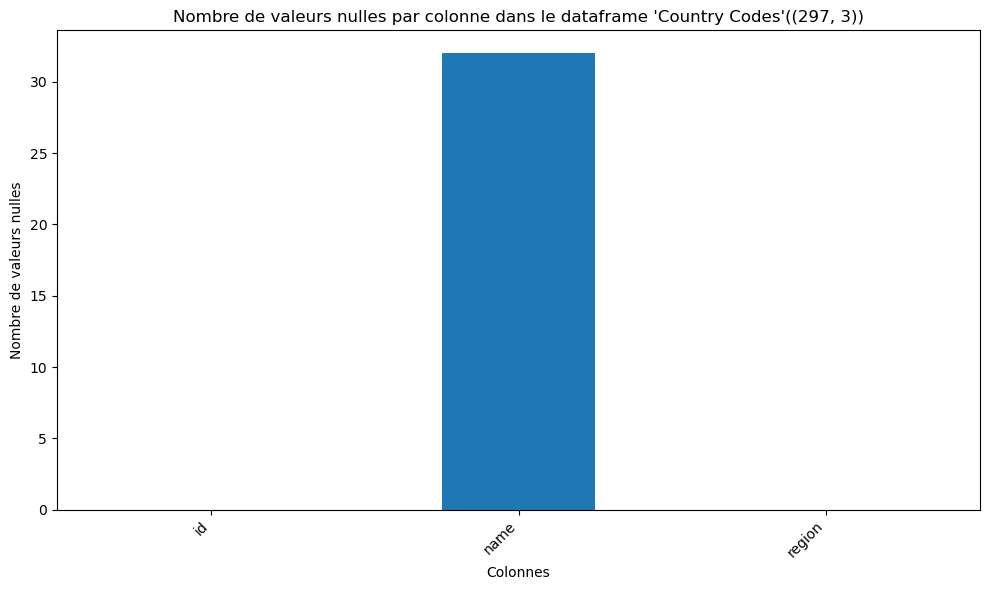

In [65]:
# Compteur de valeurs nulles (NaN) par colonne
nombre_valeurs_nulles_par_colonne = df_country_codes.isnull().sum()

# Création d'un graphique à barres pour visualiser le résultat
plt.figure(figsize=(10, 6))
nombre_valeurs_nulles_par_colonne.plot(kind='bar')
plt.title(f"Nombre de valeurs nulles par colonne dans le dataframe 'Country Codes'({df_country_codes.shape})")
plt.xlabel("Colonnes")
plt.ylabel("Nombre de valeurs nulles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
#Verifions s'il y'a des colonnes avec des caractères non-ascii
cols_cc_with_no_ascii_val = []
for col in df_country_codes.columns:
    has_non_ascii = any(df_country_codes[col].apply(lambda x: any(ord(c) > 127 for c in str(x))))
    if has_non_ascii | col.islower() == False:
        cols_cc_with_no_ascii_val.append(col)
        print(f"la colonne: '{col}' contiens des caractères non-ASCII.")
print(f"\nIl existe: {len(cols_cc_with_no_ascii_val)} colonnes avec des valeurs non-ASCII ou avec des lettres majuscules")


Il existe: 0 colonnes avec des valeurs non-ASCII ou avec des lettres majuscules


In [54]:
contains_non_ascii_cc_data = df_country_codes.applymap(contains_non_ascii).any()
if contains_non_ascii_cc_data.any():
    print("Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.")
else:
    print("Le DataFrame ne contient que des caractères ASCII.")

Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.


In [39]:
# Vérifions si il ny'a pas des données dupliquées
duplicated_cc_rows = df_country_codes[df_country_codes.duplicated()].shape[0]
print(f"Il y'a: {duplicated_cc_rows} dupliquée(s) dans ce dataframe")

Il y'a: 0 dupliquée(s) dans ce dataframe


### Analyse du dataset sur les niveaux de vies

In [57]:
if('df_CLASS' in list(datasets.keys())):
    df_CLASS = datasets['df_CLASS']
df_CLASS.head()

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


Les colonnes qui vont nous interesser dans cette base de données sont: le code, la région et le niveau de vie

In [58]:
print(f"Nous avons un dataset de {df_CLASS.shape[0]} lignes et {df_indicators.shape[1]} colonnes")

Nous avons un dataset de 267 lignes et 25 colonnes


In [59]:
df_CLASS.dtypes.unique()

array([dtype('O')], dtype=object)

*Nous avons des données qualitatives pour ce dataframe*

In [60]:
df_CLASS.describe()

,Economy,Code,Region,Income group,Lending category
count,266,266,218,217,144
unique,266,266,7,4,3
top,Aruba,ABW,Europe & Central Asia,High income,IBRD
freq,1,1,58,83,69


In [61]:
# verifions les valeurs manquantes
df_CLASS.isna().sum()

Economy               1
Code                  1
Region               49
Income group         50
Lending category    123
dtype: int64

Pour l'imputation des données manquantes, on pourra supprimer les lignes qui ont une valeur nulle dans la colonne "region". En effet c'est la colonne qui nous interessera, en plus de la colonne Code et Income group

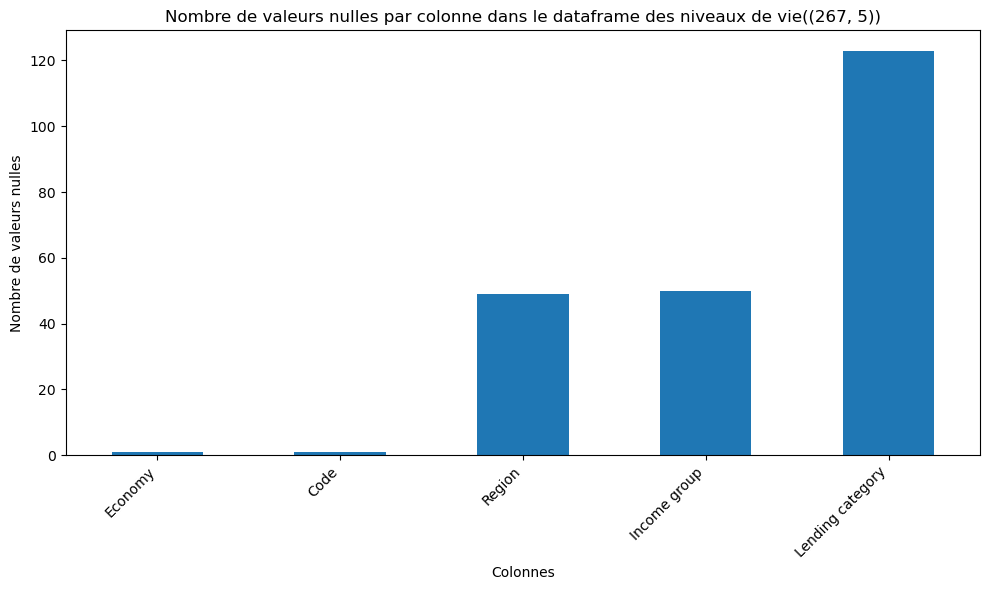

In [64]:
# Compteur de valeurs nulles (NaN) par colonne
nombre_valeurs_nulles_par_colonne2 = df_CLASS.isnull().sum()

# Création d'un graphique à barres pour visualiser le résultat
plt.figure(figsize=(10, 6))
nombre_valeurs_nulles_par_colonne2.plot(kind='bar')
plt.title(f"Nombre de valeurs nulles par colonne dans le dataframe des niveaux de vie({df_CLASS.shape})")
plt.xlabel("Colonnes")
plt.ylabel("Nombre de valeurs nulles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comme il n'ya qu'une seule valeur manquante pour le income group, on peut remplacer par la valeur la plus fréquente

In [47]:
contains_non_ascii_cls_data = df_country_codes.applymap(contains_non_ascii).any()
if contains_non_ascii_cls_data.any():
    print("Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.")
else:
    print("Le DataFrame ne contient que des caractères ASCII.")

Il y'a des valeurs avec des caractères non-ASCII dans le DataFrame, donc il faudra décoder.


In [49]:
# Vérifions si il ny'a pas des données dupliquées
duplicated_cls_rows = df_CLASS[df_CLASS.duplicated()].shape[0]
print(f"Il y'a: {duplicated_cls_rows} dupliquée(s) dans ce dataframe")

Il y'a: 0 dupliquée(s) dans ce dataframe


*D'après ces différentes explorations, on peut voir qu'il n'ya aucune ligne dupliquée dans nos datasets. Cependant il y'a des données manquantes à supprimer ou à imputer, cela dépendra du seuil fixé. IL existe des données avec des caractères non-ascii dans certains datasets, ce qui peut poser des problèmes dans le merging. Toutes les données sont considérées comme des objets alors que certaines doivent êtres numériques.*

In [4]:
list(FILTERS_PARAMS['FEATURES'].values())

['code_pays',
 'pays',
 'region',
 'population_totale',
 'migration nette',
 'croissance annuelle du PIB',
 'pourcentage total de la population au chomage',
 'inflation, prix annuel a la consommation',
 "acces a l'electricite(%population)",
 'indice du capital humain (indice entre 0 et 1)',
 'niveau de vie']

* Dans le cadre de notre projet de mise en place ....., on ne va s'interesser qu'aux colonnes:
 `'code_pays',
 'pays',
 'region',
 'population_totale',
 'migration nette',
 'croissance annuelle du PIB',
 'pourcentage total de la population au chomage',
 'inflation, prix annuel a la consommation',
 'acces a l'electricite(%population)',
 'indice du capital humain (indice entre 0 et 1)',
 'niveau de vie'`